In [63]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from matplotlib import style 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

In [64]:
# Carga el conjunto de datos
datos = pd.read_csv(filepath_or_buffer = "/home/darok/Documentos/Escuela/IEDC/uteq/Evalucion2/beisbol.csv", sep=',', low_memory=False)

In [65]:
datos

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762
5,5,New_S.,5600,718
6,6,New_Y.,5518,867
7,7,Milwaukee,5447,721
8,8,Colorado,5544,735
9,9,Houston,5598,615


In [66]:
datos.describe()

,Unnamed: 0,bateos,runs
count,30.000000,30.000000,30.000000
mean,14.500000,5523.500000,693.600000
std,8.803408,79.873067,82.479088
min,0.000000,5417.000000,556.000000
25%,7.250000,5448.250000,629.000000
50%,14.500000,5515.500000,705.500000
75%,21.750000,5575.000000,734.000000
max,29.000000,5710.000000,875.000000


In [67]:
# División del conjunto de datos en características (X) y variable objetivo (y)
X = datos['bateos'].values.reshape(-1,1)
y = datos['runs'] .values.reshape(-1,1)

In [68]:
# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [69]:
# Inicializa el modelo de Regresión Lineal
model = LinearRegression()

# Entrena el modelo
model.fit(X_train, y_train)

LinearRegression()

In [70]:
print(model.intercept_)
print(model.coef_)

[-2487.55526895]
[[0.57725067]]


In [71]:
# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [72]:
# Evaluación del modelo
print(len(y_test), len(y_pred))

15 15


In [73]:
datos2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
datos2

,Actual,Predicted
0,787,723.690228
1,593,639.411630
2,735,751.975511
3,708,736.389743
4,624,653.265646
5,707,650.379393
6,570,679.241926
7,644,650.379393
8,704,692.518692
9,610,641.720633


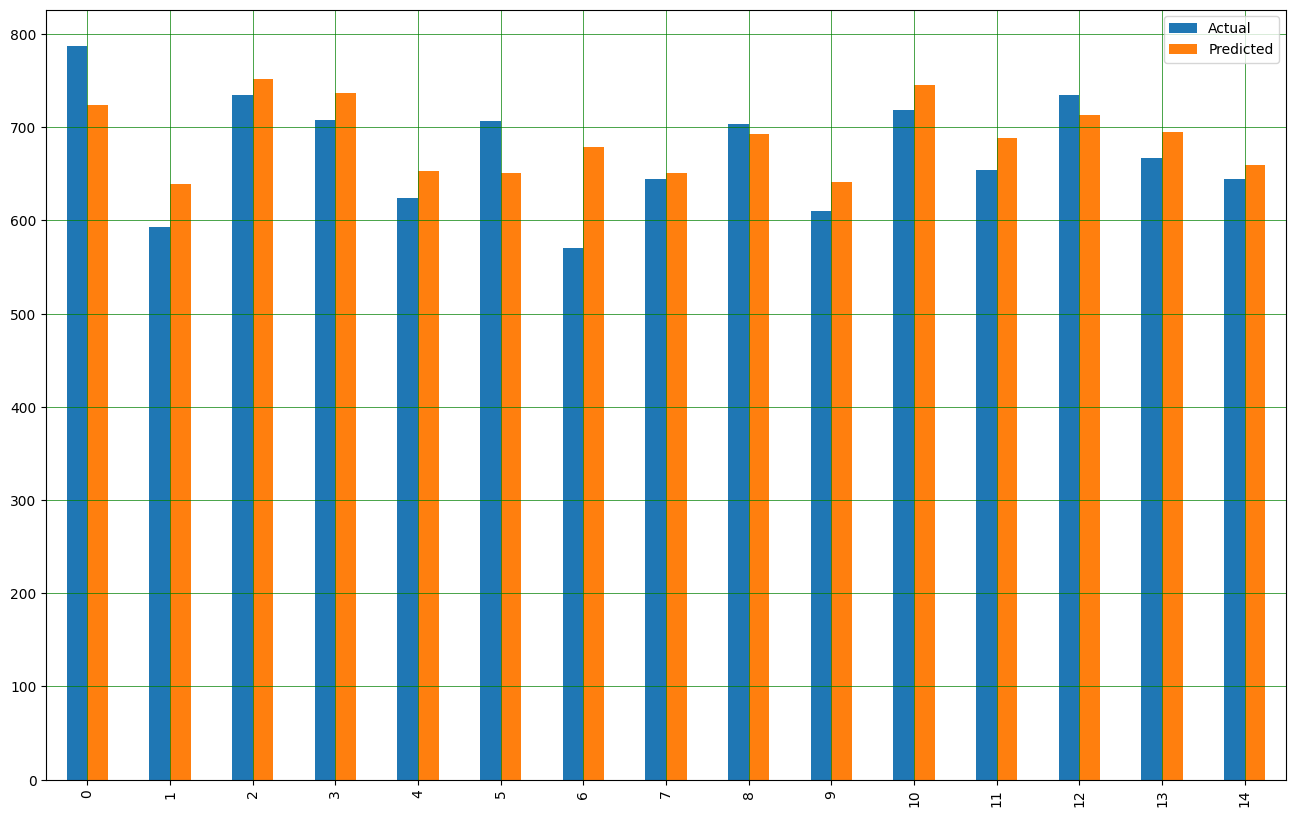

In [74]:
# Gráfica personalizada

datos2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [75]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Error Cuadrático Medio:',metrics.mean_squared_error(y_test, y_pred))
print('Raíz del Error Cuadrático Medio:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Absoluto Medio: 35.06954945326588
Error Cuadrático Medio: 1855.7217466680036
Raíz del Error Cuadrático Medio: 43.078088939366886
